In [11]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math


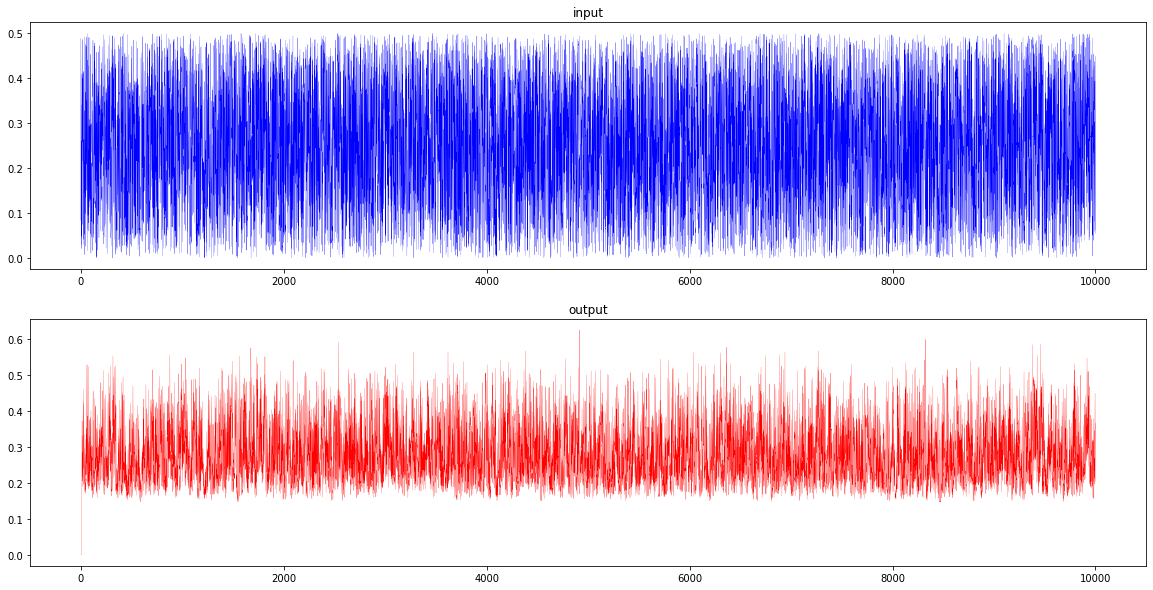

In [13]:
x, y = np.loadtxt("/home/lorenzo/Desktop/Magistrale/cns/cns_lab/Lab3_1/Assignment_1/NARMA10.csv", delimiter=",")
t=np.arange(start=0,stop=len(x), step=1)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.title('input')
plt.plot(t,x, color = 'b', linewidth= 0.2)
plt.subplot(2,1,2)
plt.title('output')
plt.plot(t,y, color = 'r', linewidth = 0.2)

x_train = x[:4000]
x_valid = x[4000:5000]
x_test = x[5000:]

y_train = x[:4000]
y_valid = x[4000:5000]
y_test = x[5000:]

## RNN

In [14]:
def create_model(hidden_units,dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0], return_sequences=True, stateful = True, batch_input_shape=(1,4000,1))) #stateful = True
    model.add(Dense(units=dense_units, activation=activation[1]))
    learning_rate = 0.01
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [15]:
model = create_model(20, 1 , (len(x_train),1), activation=['tanh', 'tanh'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (1, 4000, 20)             440       
                                                                 
 dense (Dense)               (1, 4000, 1)              21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [16]:
wx = model.get_weights()[0]
wh = model.get_weights()[1]
bh = model.get_weights()[2]
wy = model.get_weights()[3]
by = model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)




wx =  [[ 0.14812273 -0.3970122  -0.39094287 -0.22652882  0.12769431  0.38415593
  -0.26817334 -0.12325686  0.36645663 -0.16473034 -0.0189594   0.00747043
   0.51648253 -0.30716732 -0.00939667 -0.36918578 -0.22398093 -0.49679995
  -0.30328307  0.22518194]]  wh =  [[ 0.46597707 -0.3276847   0.13022266  0.14762418  0.31828576 -0.3427273
  -0.00644569  0.03261347 -0.23713744  0.12431984 -0.01406673  0.43972236
   0.19942622  0.16853341 -0.17047483  0.17694096 -0.01068244  0.0444857
   0.14031059 -0.03600943]
 [ 0.31125405  0.12592757 -0.40015     0.3037107  -0.04478904  0.29364997
  -0.1087096   0.00458989 -0.20046186  0.33765888 -0.09798708 -0.26761144
  -0.16312674 -0.10303354 -0.1183895   0.11502629  0.16537334 -0.150739
   0.4223021  -0.08080138]
 [ 0.0875988  -0.23279043 -0.29749757  0.01761886 -0.42528427 -0.02958902
   0.07392018  0.08208079  0.06572448  0.3462712  -0.12662     0.17252032
   0.1950205   0.30685157  0.29193935 -0.28820738  0.23752357 -0.17307127
  -0.31220973 -0.0320

In [17]:
print(x_train.shape)

(4000,)


In [18]:

X_train = np.reshape(x_train, (1,len(x_train),1))
Y_train = np.reshape(y_train, (1,len(y_train),1))

X_valid = np.reshape(x_valid, (1,len(x_valid),1))
Y_valid = np.reshape(y_valid, (1,len(y_valid),1))

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)


model.evaluate(X_train, Y_train)
#history = model.fit(X_train, Y_train, epochs = 100, validation_data = (X_valid, Y_valid))
history = model.fit(X_train, Y_train,validation_data = (X_valid, Y_valid), epochs = 300).history




(1, 4000, 1)
(1, 4000, 1)
(1, 1000, 1)
(1, 1000, 1)
1/1 [==============================] - 0s 353ms/step - loss: 0.1324
Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 0.1329 - val_loss: 0.0977
Epoch 2/300
1/1 [==============================] - 0s 444ms/step - loss: 0.0988 - val_loss: 0.0693
Epoch 3/300
1/1 [==============================] - 0s 499ms/step - loss: 0.0702 - val_loss: 0.0507
Epoch 4/300
1/1 [==============================] - 0s 487ms/step - loss: 0.0508 - val_loss: 0.0422
Epoch 5/300
1/1 [==============================] - 0s 427ms/step - loss: 0.0413 - val_loss: 0.0405
Epoch 6/300
1/1 [==============================] - 0s 418ms/step - loss: 0.0389 - val_loss: 0.0417
Epoch 7/300
1/1 [==============================] - 0s 427ms/step - loss: 0.0399 - val_loss: 0.0432
Epoch 8/300
1/1 [==============================] - 0s 440ms/step - loss: 0.0413 - val_loss: 0.0438
Epoch 9/300
1/1 [==============================] - 0s 432ms/step - loss: 0.0421 - val_loss:

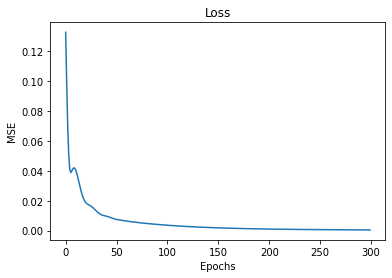

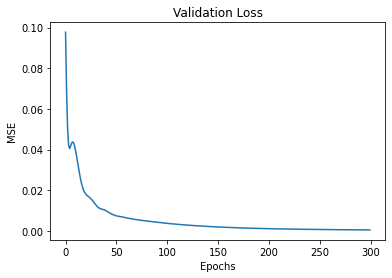

In [19]:
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

plt.plot(history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

1/1 [==============================] - 0s 41ms/step - loss: 4.9978e-04


0.0004997808719053864

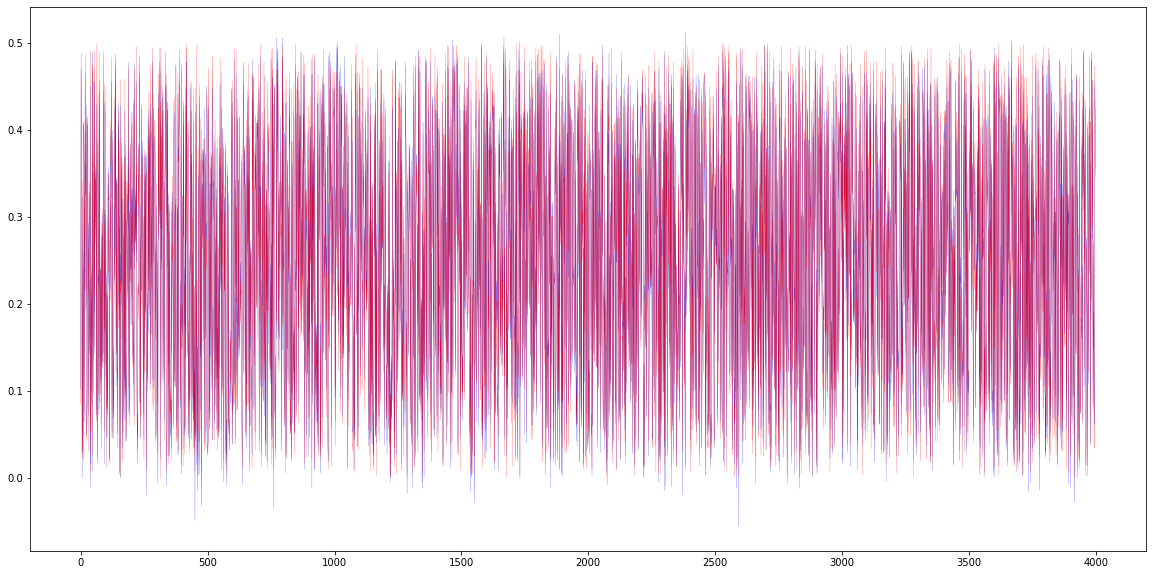

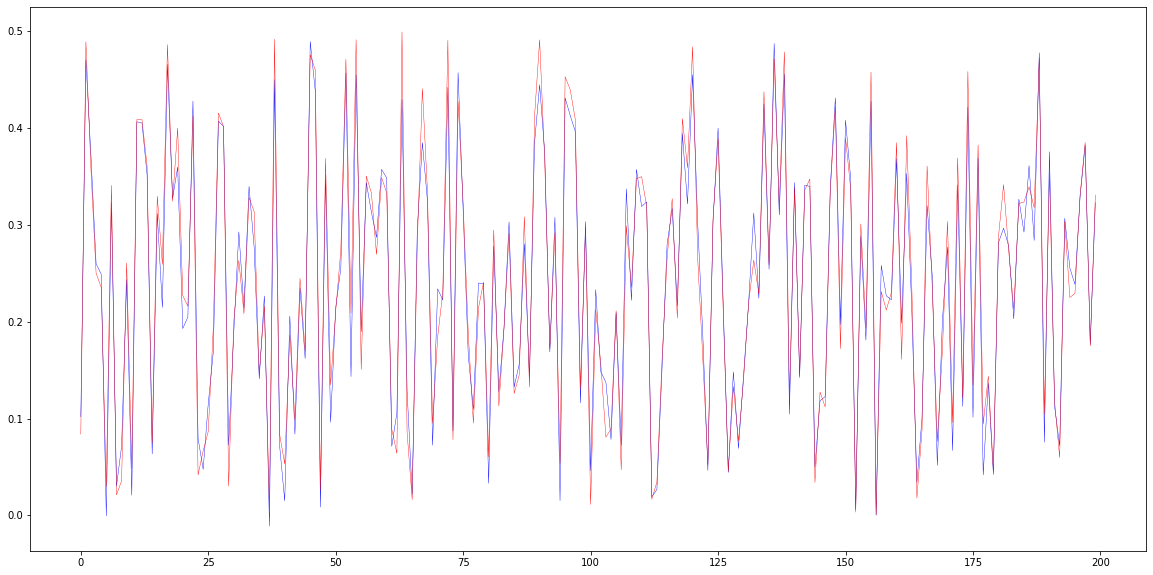

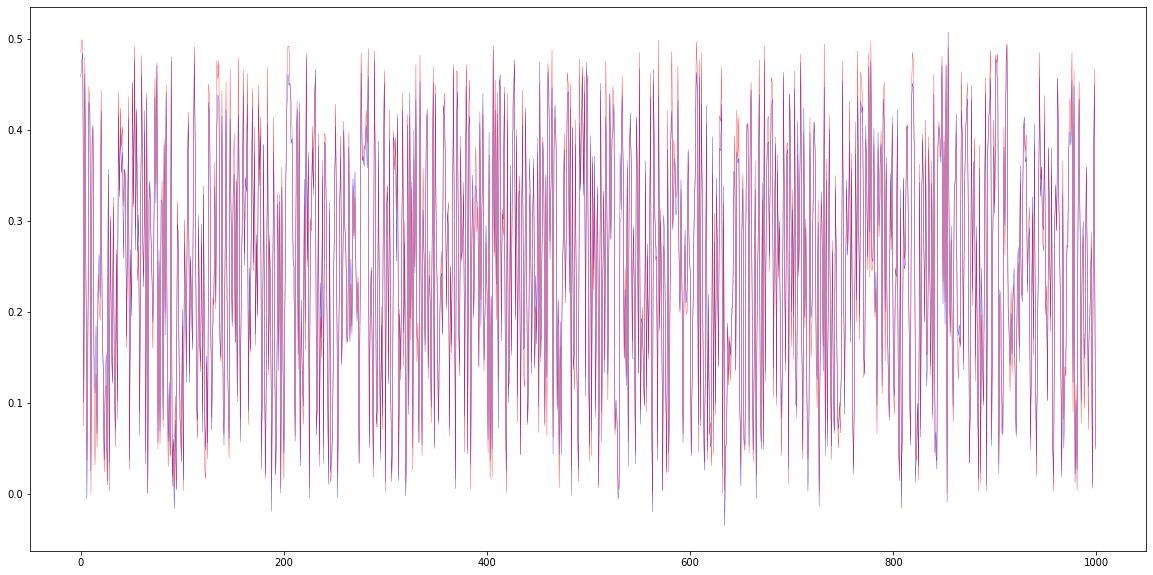

In [20]:
y = model.predict(X_train)
t=np.arange(start=0,stop=len(X_train[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.2)
plt.plot(t,Y_train.ravel(), color = 'r', linewidth= 0.2)
model.evaluate(X_train, Y_train)

plt.figure(figsize = (20,10))
plt.plot(t[:200],y.ravel()[:200], color = 'b', linewidth= 0.4)
plt.plot(t[:200],Y_train.ravel()[:200], color = 'r', linewidth= 0.4)

y = model.predict(X_valid)
t=np.arange(start=0,stop=len(X_valid[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.3)
plt.plot(t,Y_valid.ravel(), color = 'r', linewidth= 0.3)
model.evaluate(X_valid, Y_valid)

